In [1]:
import utils_regression
import uproot
import root_numpy
import ROOT

Welcome to JupyROOT 6.14/04


In [2]:
#I wrote some functions that retrieve the locations of all files.
dir(utils_regression)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'baseline_selection',
 'baseline_variables',
 'baseline_weight',
 'c',
 'campaigns',
 'd',
 'data_all_files',
 'data_files_dict',
 'diboson_all_files',
 'diboson_dsids',
 'diboson_files_dict',
 'hmumu_files_dir',
 'hzz_files_dir',
 'key',
 'os',
 'signal_all_files',
 'signal_dsids',
 'signal_files_dict',
 'ttbar_all_files',
 'ttbar_dsids',
 'ttbar_files_dict',
 'zjets_all_files',
 'zjets_dsids',
 'zjets_files_dict']

In [3]:
#Here are all simulated signal files assocated with ggH and VBF Higgs Boson production
utils_regression.zjets_all_files
utils_regression.signal_all_files

['/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root']

In [4]:
#lets open one of the files, and take a look inside
f = "/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root"
f_uproot = uproot.open(f)
f_uproot.keys()
#you can see one tree called "DiMuonNtuple"
#Lets open it and take a look inside:

[b'DiMuonNtuple;1']

In [5]:
tree = f_uproot["DiMuonNtuple"]
tree.keys()
#here are all of the variables... there are quite a lot. Lets not focus on too many of them right now. 

[b'EventInfo_RunNumber',
 b'MetaData_IsFullSim',
 b'EventInfo_ChannelNumber',
 b'EventInfo_LumiBlock',
 b'EventInfo_EventNumber',
 b'EventInfo_RndRunNumber',
 b'Event_CorrAverageMu',
 b'Event_CorrActualMu',
 b'Event_RandomVal',
 b'Truth_Boson_Mass',
 b'PMGWeightName',
 b'PMGWeightValue',
 b'EventInfo_PassTrigger',
 b'EventInfo_PassTriggerMatching',
 b'EventInfo_PassElectronTrigger',
 b'EventInfo_PassElectronTriggerMatch',
 b'EventInfo_Pass_HLT_xe70_mht',
 b'EventInfo_Pass_HLT_xe90_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_pufit_L1XE55',
 b'EventInfo_Pass_HLT_xe110_pufit_xe70_L1XE50',
 b'Muons_Charge_Lead',
 b'Muons_Charge_Sub',
 b'Muons_Type_Lead',
 b'Muons_Type_Sub',
 b'Muons_Multip',
 b'Muons_TruthOrigin_Lead',
 b'Muons_TruthOrigin_Sub',
 b'Muons_TruthType_Lead',
 b'Muons_TruthType_Sub',
 b'Muons_Minv_MuMu',
 b'Muons_PT_Lead',
 b'Muons_PT_Sub',
 b'Muons_Eta_Lead',
 b'Muons_Eta_Sub',
 b'Muons_Phi_Lead',
 b'Muons_Phi_Sub',
 b'Muons_Minv_MuMu_Fsr'

In [6]:
#Lets get a dataframe for all signal_files
import pandas as pd
dataframes = []
#these are all of the variables needed to calcualte the event weight
variables = ["Muons_Minv_MuMu"] + utils_regression.baseline_variables 
#This is the selection that is to be always applied when looking at events with two muons
selection = utils_regression.baseline_selection
for file in utils_regression.signal_all_files:
    dataframes.append(tree.pandas.df(variables).query(selection))
dataframes = pd.concat(dataframes)
selection

'(PassesDiMuonSelection == 1) and (Muons_PT_Sub>15)'

In [7]:
hist_min= 100.0 #GeV
hist_max = 200.0 #GeV
nbins = 100 
size = (hist_max - hist_min)/float(nbins)
hist = ROOT.TH1D("InvMass", "InvMass", 100, 100.0, 200.0)
root_numpy.fill_hist(hist, dataframes.eval("Muons_Minv_MuMu").values, dataframes.eval(utils_regression.baseline_weight).values)


Applying ATLAS style settings...



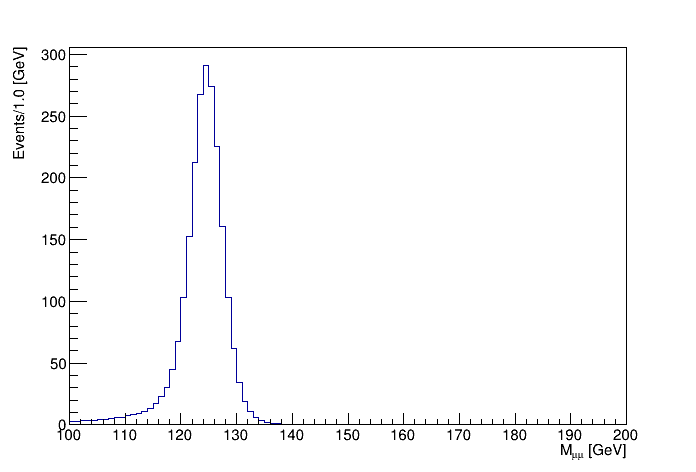

In [8]:
#Lets make a plot of the invariant mass distribution: 
c1 = ROOT.TCanvas("canv", "canv")
from atlasplots import atlas_style as astyle
astyle.SetAtlasStyle()
hist.Draw("HIST")
hist.GetXaxis().SetTitle("M_{#mu#mu} [GeV]")
hist.GetYaxis().SetTitle("Events/{} [GeV]".format(size))
c1.Draw()

In [9]:
#similarly you can try to do this the Z+Jets background:
#All of the z+jets background files, for only mc16a, for example
zjets_files = utils_regression.zjets_files_dict["mc16a"]
zjets_files

['/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364101.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364102.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364103.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364104.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364105.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-

In [10]:
#OK That aside, we can also look at the mis measurement of the leptons, and try to understand it as a function of the pT and eta
#I am taking one Z+Jet file here as an example
test_file = '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root'
t = uproot.open(test_file)["DiMuonNtuple"]

In [11]:
t.keys()
#here you can see that the contents of the tree as before, is identical

[b'EventInfo_RunNumber',
 b'MetaData_IsFullSim',
 b'EventInfo_ChannelNumber',
 b'EventInfo_LumiBlock',
 b'EventInfo_EventNumber',
 b'EventInfo_RndRunNumber',
 b'Event_CorrAverageMu',
 b'Event_CorrActualMu',
 b'Event_RandomVal',
 b'Truth_Boson_Mass',
 b'EventInfo_PassTrigger',
 b'EventInfo_PassTriggerMatching',
 b'EventInfo_PassElectronTrigger',
 b'EventInfo_PassElectronTriggerMatch',
 b'EventInfo_Pass_HLT_xe70_mht',
 b'EventInfo_Pass_HLT_xe90_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_pufit_L1XE55',
 b'EventInfo_Pass_HLT_xe110_pufit_xe70_L1XE50',
 b'Muons_Charge_Lead',
 b'Muons_Charge_Sub',
 b'Muons_Type_Lead',
 b'Muons_Type_Sub',
 b'Muons_Multip',
 b'Muons_TruthOrigin_Lead',
 b'Muons_TruthOrigin_Sub',
 b'Muons_TruthType_Lead',
 b'Muons_TruthType_Sub',
 b'Muons_Minv_MuMu',
 b'Muons_PT_Lead',
 b'Muons_PT_Sub',
 b'Muons_Eta_Lead',
 b'Muons_Eta_Sub',
 b'Muons_Phi_Lead',
 b'Muons_Phi_Sub',
 b'Muons_Minv_MuMu_Fsr',
 b'Muons_Minv_MuMu_Sigma',
 b'Muons_M

In [12]:
#Lets study the width of the mis-measurement distrbutions of each of the leptons
#Lets add the truth and reconstructed muon momenta
variables += ["Muons_PT_Lead", \
              "Muons_Eta_Lead", \
              "Muons_Phi_Lead", \
              "Muons_PT_Sub", \
              "Muons_Eta_Sub", \
              "Muons_Phi_Sub",\
              "Truth_PT_Lead_Muon", \
              "Truth_Eta_Lead_Muon" ,\
              "Truth_Phi_Lead_Muon",\
              "Truth_PT_Sub_Muon",\
              "Truth_Eta_Lead_Muon",\
              "Truth_Phi_Lead_Muon"]
zjet_dataframe = t.pandas.df(variables).query(utils_regression.baseline_selection)

In [13]:
zjet_dataframe

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
0              92.800499                      1     38.695007     10.847424   
1              89.534073                      1     30.027029     -6.701626   
2              85.061646                      1     32.741680      8.333323   
3              90.435577                      1     43.400837      9.562961   
4             116.854149                      1     57.511036     11.497942   
5              92.000847                      1     39.175838      0.000491   
6              89.954041                      1     51.297409      9.657840   
7              81.035339                      1     26.005234     11.772875   
8              93.551170                      1     44.795429    -11.230927   
9              73.816971                      1     31.289431    -10.918963   
11             93.873932                      1     41.894310      9.192299   
13             81.329552                      1     38.980984      9.100215   
14             44.784679                      1     17.376865     10.061410   
16             90.780373                      1     43.260933      8.834151   
17            107.739990                      1     41.838013      7.288063   
18             87.800079                      1     33.777420     10.661059   
19             87.688255                      1     31.420715      9.208808   
20             95.721436                      1     36.776733      9.899782   
23             76.772003                      1     30.661081      8.243889   
27             85.376305                      1     32.015835      0.872321   
28             85.041054                      1     39.170837      7.709909   
29             92.075119                      1     46.298401     10.940351   
30             88.744026                      1     33.562592     11.291110   
31             89.798401                      1     41.926239      9.718702   
32             88.861649                      1     35.588676     10.403110   
33             91.857582                      1     38.870636      9.735732   
34             87.228142                      1     37.830402     11.562196   
35             89.872856                      1     40.540977     10.379346   
36             68.315666                      1     29.804752     11.616770   
37             91.517319                      1     32.579021     12.475042   
...                  ...                    ...           ...           ...   
3725439        90.732338                      1     28.971102     10.452291   
3725440        91.870422                      1     34.619629      9.023530   
3725441        91.259056                      1     33.885017     -9.313231   
3725442        92.540398                      1     29.122957     10.761342   
3725444        93.410568                      1     33.213348    -10.772897   
3725445        89.671448                      1     43.696663      7.324502   
3725446        90.251663                      1     35.098831     10.725348   
3725448        90.738029                      1     37.828644     10.065392   
3725450        89.468178                      1     37.846592    -11.771339   
3725451        88.923759                      1     29.224737     12.111364   
3725452        91.333061                      1     38.300449    -14.291353   
3725453        89.185204                      1     41.666626     12.585575   
3725454        75.423363                      1     32.447815      8.945626   
3725455        93.309631                      1     35.463146      9.190464   
3725456        97.401344                      1     25.165136      8.074294   
3725457        89.120605                      1     40.796360      7.763956   
3725458        90.587303                      1     42.448376    -10.202579   
3725459        88.086540                      1     30.9374

In [14]:
x_lead = zjet_dataframe.eval("(Muons_PT_Lead - Truth_PT_Lead_Muon)/Muons_PT_Lead").values
x_sub = zjet_dataframe.eval("(Muons_PT_Sub - Truth_PT_Sub_Muon)/Muons_PT_Sub").values
#Lets put this back into the dataframe
zjet_dataframe["x_Lead"] = x_lead
zjet_dataframe["x_Sub"] = x_sub

In [15]:
zjet_dataframe

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
0              92.800499                      1     38.695007     10.847424   
1              89.534073                      1     30.027029     -6.701626   
2              85.061646                      1     32.741680      8.333323   
3              90.435577                      1     43.400837      9.562961   
4             116.854149                      1     57.511036     11.497942   
5              92.000847                      1     39.175838      0.000491   
6              89.954041                      1     51.297409      9.657840   
7              81.035339                      1     26.005234     11.772875   
8              93.551170                      1     44.795429    -11.230927   
9              73.816971                      1     31.289431    -10.918963   
11             93.873932                      1     41.894310      9.192299   
13             81.329552                      1     38.980984      9.100215   
14             44.784679                      1     17.376865     10.061410   
16             90.780373                      1     43.260933      8.834151   
17            107.739990                      1     41.838013      7.288063   
18             87.800079                      1     33.777420     10.661059   
19             87.688255                      1     31.420715      9.208808   
20             95.721436                      1     36.776733      9.899782   
23             76.772003                      1     30.661081      8.243889   
27             85.376305                      1     32.015835      0.872321   
28             85.041054                      1     39.170837      7.709909   
29             92.075119                      1     46.298401     10.940351   
30             88.744026                      1     33.562592     11.291110   
31             89.798401                      1     41.926239      9.718702   
32             88.861649                      1     35.588676     10.403110   
33             91.857582                      1     38.870636      9.735732   
34             87.228142                      1     37.830402     11.562196   
35             89.872856                      1     40.540977     10.379346   
36             68.315666                      1     29.804752     11.616770   
37             91.517319                      1     32.579021     12.475042   
...                  ...                    ...           ...           ...   
3725439        90.732338                      1     28.971102     10.452291   
3725440        91.870422                      1     34.619629      9.023530   
3725441        91.259056                      1     33.885017     -9.313231   
3725442        92.540398                      1     29.122957     10.761342   
3725444        93.410568                      1     33.213348    -10.772897   
3725445        89.671448                      1     43.696663      7.324502   
3725446        90.251663                      1     35.098831     10.725348   
3725448        90.738029                      1     37.828644     10.065392   
3725450        89.468178                      1     37.846592    -11.771339   
3725451        88.923759                      1     29.224737     12.111364   
3725452        91.333061                      1     38.300449    -14.291353   
3725453        89.185204                      1     41.666626     12.585575   
3725454        75.423363                      1     32.447815      8.945626   
3725455        93.309631                      1     35.463146      9.190464   
3725456        97.401344                      1     25.165136      8.074294   
3725457        89.120605                      1     40.796360      7.763956   
3725458        90.587303                      1     42.448376    -10.202579   
3725459        88.086540                      1     30.9374

In [16]:
#Lets start by trying to understand how the width of the following distributions varies as a function of lepton
#kinematics
import numpy as np
import matplotlib.pyplot as plt
bins = np.linspace(-0.1, +0.1, 50)
x = np.concatenate( [zjet_dataframe.eval("x_Lead").values, zjet_dataframe.eval("x_Sub").values], axis=0)
weights = np.concatenate([zjet_dataframe.eval(utils_regression.baseline_weight).values, zjet_dataframe.eval(utils_regression.baseline_weight).values], axis=0)
plt.hist(x, weights = weights, bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
import numpy as np
def get_x_w_from_frame(frame, leadname="x_Lead", subname="x_Sub", selection="", weightname = utils_regression.baseline_weight):
    if selection: 
        frame_lead = frame.query(selection.format(STAT="Lead"))
        frame_sub = frame.query(selection.format(STAT="Sub"))
    else:
        frame_lead = frame
        frame_sub = frame
    x = np.concatenate([frame_lead.eval(leadname).values, frame_sub.eval(subname).values], axis=0)
    w = np.concatenate([frame_lead.eval(weightname).values, frame_sub.eval(weightname).values])
    return x, w

In [18]:
#OK Lets do a fit
selection = "(Muons_PT_{STAT} > 20.0) and (Muons_PT_{STAT} <= 30.0) and (abs(Muons_Eta_{STAT}) < 0.7)"
x, w = get_x_w_from_frame(zjet_dataframe, selection=selection)

In [19]:
x, w

len(w), len(x)

(277834, 277834)

In [20]:
np.average(w) #the average weight is pretty large... hmph

6.086922

In [21]:
#OK lets make a roodataset and try fitting a gaussian
roo_x = ROOT.RooRealVar("x", "x", 0.0, -0.5, 0.5) # a RooRealVar that can take values from -0.5, to 0.5, 
#and is currently set to 0.0. Though generally, variable will take on the variables from the data values ("x") when 
#we create RooDataSet
roo_w = ROOT.RooRealVar("weight", "weight", 0.0, -10000000.0, 100000000.0) #similarly this is a RooRealVar to
#represent the weights 
roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [22]:
import numpy as np
import root_numpy as rnp
for_tree = np.core.records.fromarrays([x,w], names=",".join(["x","weight"]))
tree_for_roodataset = rnp.array2tree(for_tree)
tree_for_roodataset

<ROOT.TTree object ("tree") at 0xf1366e0>

In [23]:
x_dataset = ROOT.RooDataSet("Test", "Test", roo_xw, ROOT.RooFit.Import(tree_for_roodataset), ROOT.RooFit.WeightVar("weight"))
x_dataset
x_dataset.Print()
#the above lines should create and print the dataset values

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Test) Ignored 14 out of range events
RooDataSet::Test[x,weight:weight] = 277820 entries (1.69108e+06 weighted)


[#1] INFO:InputArguments -- RooAbsData::plotOn(Test) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


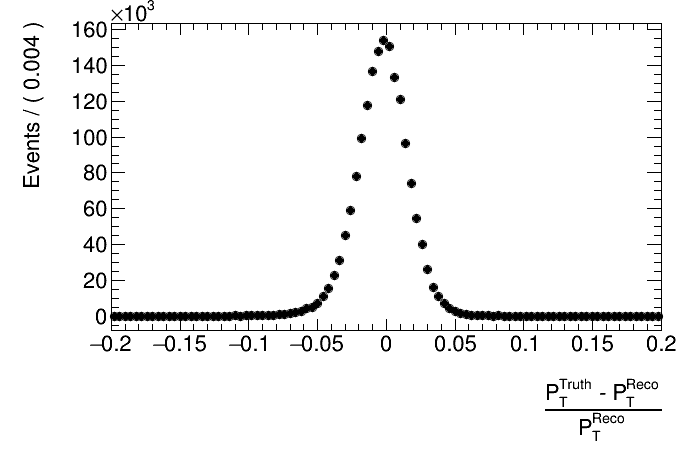

In [24]:
#roodatasets use a frame from plotting, and you can plot things on the frame like so:
xframe = roo_x.frame( ROOT.RooFit.Range(-0.2, 0.2) )
xframe.GetXaxis().SetTitle("#frac{P^{Truth}_{T} - P^{Reco}_{T}}{P^{Reco}_{T}}")
xframe.GetXaxis().SetTitleOffset(2.1)
x_dataset.plotOn(xframe)
canvas = ROOT.TCanvas("canv", "canv")
canvas.SetBottomMargin(0.3)
xframe.Draw()
canvas.Draw()

In [25]:
#OK now lets do an unbinned fit to this roodataset with a gaussian function
mean = ROOT.RooRealVar("mean","mean",0.0,-0.05,0.05)
sigma = ROOT.RooRealVar("sigma","sigma",0.01,0.0,0.5)
gaus = ROOT.RooGaussian("Gaus", "Gaus", roo_x, mean, sigma) #this would prepare a gaussian PDF that we can fit to the data

#func = ROOT.BreitWigner("BW", "BW", roo_x, mean, sigma)

In [26]:
gaus.fitTo(x_dataset, ROOT.RooFit.Strategy(2), ROOT.RooFit.Range(-0.05, 0.05), ROOT.RooFit.SumW2Error(True))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit' created with bounds [-0.05,0.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_Gaus_Test) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForfit' created with bounds [-0.5,0.5]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_Gaus_Test' created with bounds [-0.05,0.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_Gaus_Test) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         0.00000e+00  1.00000e-02   -5.00000e-02  5.00000e-02
     2 sigma        1.00000e-02  5.00000e-03    0.00000e+00  5.00000e

In [27]:
mean_result = mean.getVal()
sigam_result = sigma.getVal()
mean_error = mean.getError()
sigma_error = sigma.getError()

[#1] INFO:InputArguments -- RooAbsData::plotOn(Test) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Gaus) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Gaus) only plotting range 'fit_nll_Gaus_Test'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Gaus) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_Gaus_Test'


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


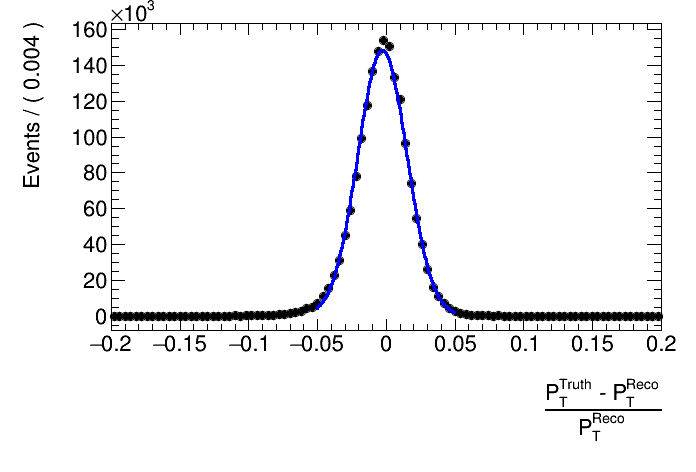

In [28]:
#roodatasets use a frame, so you can plot things on the dataframe like so:
xframe = roo_x.frame( ROOT.RooFit.Range(-0.2, 0.2) )
xframe.GetXaxis().SetTitle("#frac{P^{Truth}_{T} - P^{Reco}_{T}}{P^{Reco}_{T}}")
xframe.GetXaxis().SetTitleOffset(2.1)
x_dataset.plotOn(xframe)
gaus.plotOn(xframe)
canvas = ROOT.TCanvas("canv", "canv")
canvas.SetBottomMargin(0.3)
xframe.Draw()
canvas.Draw()

In [29]:
zjet_dataframe

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
0              92.800499                      1     38.695007     10.847424   
1              89.534073                      1     30.027029     -6.701626   
2              85.061646                      1     32.741680      8.333323   
3              90.435577                      1     43.400837      9.562961   
4             116.854149                      1     57.511036     11.497942   
5              92.000847                      1     39.175838      0.000491   
6              89.954041                      1     51.297409      9.657840   
7              81.035339                      1     26.005234     11.772875   
8              93.551170                      1     44.795429    -11.230927   
9              73.816971                      1     31.289431    -10.918963   
11             93.873932                      1     41.894310      9.192299   
13             81.329552                      1     38.980984      9.100215   
14             44.784679                      1     17.376865     10.061410   
16             90.780373                      1     43.260933      8.834151   
17            107.739990                      1     41.838013      7.288063   
18             87.800079                      1     33.777420     10.661059   
19             87.688255                      1     31.420715      9.208808   
20             95.721436                      1     36.776733      9.899782   
23             76.772003                      1     30.661081      8.243889   
27             85.376305                      1     32.015835      0.872321   
28             85.041054                      1     39.170837      7.709909   
29             92.075119                      1     46.298401     10.940351   
30             88.744026                      1     33.562592     11.291110   
31             89.798401                      1     41.926239      9.718702   
32             88.861649                      1     35.588676     10.403110   
33             91.857582                      1     38.870636      9.735732   
34             87.228142                      1     37.830402     11.562196   
35             89.872856                      1     40.540977     10.379346   
36             68.315666                      1     29.804752     11.616770   
37             91.517319                      1     32.579021     12.475042   
...                  ...                    ...           ...           ...   
3725439        90.732338                      1     28.971102     10.452291   
3725440        91.870422                      1     34.619629      9.023530   
3725441        91.259056                      1     33.885017     -9.313231   
3725442        92.540398                      1     29.122957     10.761342   
3725444        93.410568                      1     33.213348    -10.772897   
3725445        89.671448                      1     43.696663      7.324502   
3725446        90.251663                      1     35.098831     10.725348   
3725448        90.738029                      1     37.828644     10.065392   
3725450        89.468178                      1     37.846592    -11.771339   
3725451        88.923759                      1     29.224737     12.111364   
3725452        91.333061                      1     38.300449    -14.291353   
3725453        89.185204                      1     41.666626     12.585575   
3725454        75.423363                      1     32.447815      8.945626   
3725455        93.309631                      1     35.463146      9.190464   
3725456        97.401344                      1     25.165136      8.074294   
3725457        89.120605                      1     40.796360      7.763956   
3725458        90.587303                      1     42.448376    -10.202579   
3725459        88.086540                      1     30.9374

In [32]:
pt_bindex = np.ones(len(zjet_dataframe), np.int32)

In [33]:
pt_bindex

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [36]:
dict_bindex_to_sel = {10: "Muons_PT_Lead > 20.0 and Muons_PT_Lead < 30.0"}

In [37]:
zjet_dataframe["index"] = np.arange(0, len(zjet_dataframe))

In [46]:
for bindex in dict_bindex_to_sel:
    selection = dict_bindex_to_sel[bindex]
    selected_events = zjet_dataframe.query(selection)["index"].values
    pt_bindex[selected_events] = bindex
zjet_dataframe["pt_bindex"] = pt_bindex

In [47]:
selected_events

array([     12,      32,      39, ..., 2954355, 2954358, 2954414])

In [48]:
pt_bindex

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [49]:
pt_bindex[selected_events]

array([10, 10, 10, ..., 10, 10, 10], dtype=int32)

In [50]:
zjet_dataframe["pt_bindex"]

entry
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
11          1
13          1
14         10
16          1
17          1
18          1
19          1
20          1
23          1
27          1
28          1
29          1
30          1
31          1
32          1
33          1
34          1
35          1
36          1
37          1
           ..
3725439     1
3725440     1
3725441     1
3725442     1
3725444     1
3725445     1
3725446     1
3725448     1
3725450     1
3725451     1
3725452     1
3725453     1
3725454     1
3725455     1
3725456     1
3725457     1
3725458     1
3725459     1
3725460     1
3725461     1
3725462     1
3725463     1
3725464     1
3725465     1
3725466     1
3725467     1
3725468     1
3725469     1
3725470     1
3725471     1
Name: pt_bindex, Length: 2954457, dtype: int32

In [51]:
zjet_dataframe.query("pt_bindex == 10")

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
14             44.784679                      1     17.376865     10.061410   
41             91.762161                      1     17.850254    -11.672415   
50             83.070122                      1     26.153534     10.865836   
158            90.515495                      1     24.406254     13.448133   
182            56.968853                      1     18.452139    -10.698125   
187            87.700912                      1     27.957214      8.831985   
225            55.921825                      1     27.401119     11.409095   
238            87.429138                      1     20.467299     11.009222   
254            76.196716                      1     22.647671     11.733289   
261            54.426151                      1     26.094421     10.943941   
287            94.830246                      1     25.698847      9.955695   
307            84.363792                      1     27.506287      7.135822   
363            89.658508                      1     28.169029      9.591923   
413            86.552238                      1     26.376953      8.759355   
488            43.112934                      1     16.002735     13.050327   
608            92.685219                      1     20.803085     11.515925   
614            78.456390                      1     20.066664     10.716817   
651            85.943451                      1     19.560616      7.286181   
662            90.135338                      1     20.624556      9.282921   
680            87.604546                      1     24.708778     10.066520   
689            50.454967                      1     22.848557      8.266870   
755            91.867668                      1     17.341629     12.924549   
784            93.133842                      1     26.505678     11.792817   
801            91.883942                      1     22.602850      9.181593   
812            57.401798                      1     27.238857     12.111217   
868            55.798767                      1     27.099693     10.653854   
869            91.746094                      1     26.933346      9.712229   
883            79.285797                      1     29.539179      6.567698   
928            67.510773                      1     28.114985     10.317630   
940            98.224129                      1     18.943777     11.272306   
...                  ...                    ...           ...           ...   
3723936        90.460518                      1     24.884911     12.228396   
3724112        53.842144                      1     25.395391     10.188563   
3724238        92.909821                      1     24.991604     12.010307   
3724274        88.415962                      1     26.126432     -9.652965   
3724300        82.449333                      1     26.262999     10.141405   
3724366        91.014503                      1     28.567217     10.666129   
3724430        92.777458                      1     28.328856      9.863249   
3724473        88.544456                      1     28.466473     10.049323   
3724492        92.606850                      1     22.486647      8.854324   
3724523        46.518570                      1     19.373190      9.462465   
3724564        88.377724                      1     23.281252     10.714044   
3724602        61.011902                      1     26.998655      7.485596   
3724605        92.419510                      1     27.356104     13.512195   
3724775        91.303787                      1     28.390825     11.364346   
3724785        88.434166                      1     25.351343      9.258008   
3724837        90.478767                      1     27.992807     -8.092776   
3724899        88.090027                      1     27.420273      9.958160   
3724910        69.448639                      1     22.4579